<a href="https://colab.research.google.com/github/Sompote/COV_pile/blob/main/LSTM_stress_strain_multistep18_AUG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/strain.csv')

ks=pd.DataFrame()
#ks=df.iloc[::100, :].reset_index(drop=True)
#ks=ks.drop([0])

for step in range(5,100,10):
  ks_step=df.iloc[::step, :].reset_index(drop=True)
  ks=ks.append(ks_step,ignore_index=True)


ks

,q,p,es,u
0,-0.095355,50.092305,-0.004090,-0.11409
1,0.095359,50.164876,-0.008280,-0.12309
2,7.088590,52.477943,-0.008912,-0.10508
3,9.758790,53.331980,-0.009572,-0.06905
4,18.629936,55.982799,-0.022473,0.23718
...,...,...,...,...
2739,263.652581,172.014734,10.091149,-34.12054
2740,262.965619,172.365176,10.247585,-34.69997
2741,260.677527,172.103859,10.416277,-35.20135
2742,262.684876,173.100215,10.576229,-35.52859


In [26]:
ks.shape

(2901, 4)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

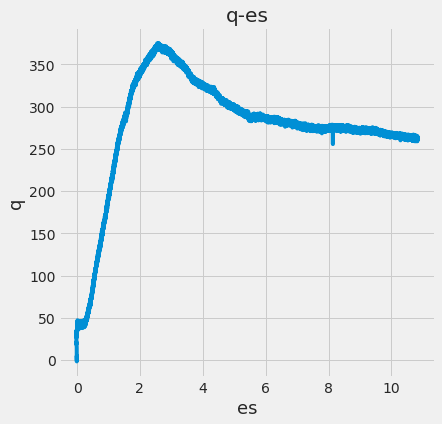

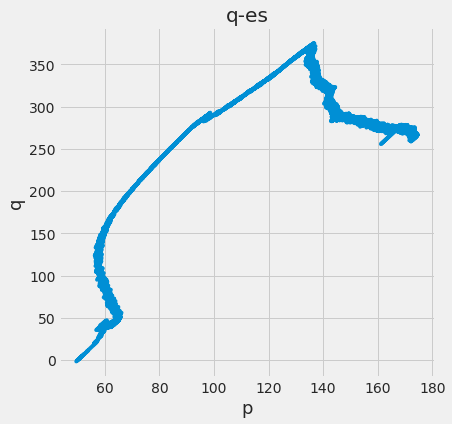

In [49]:
#plotdata
plt.figure(figsize=(6,6))
plt.title('q-es')
plt.plot(df['es'],df['q'])
plt.xlabel('es', fontsize=18)
plt.ylabel('q', fontsize=18)
plt.show()

plt.figure(figsize=(6,6))
plt.title('q-es')
plt.plot(df['p'],df['q'])
plt.xlabel('p', fontsize=18)
plt.ylabel('q', fontsize=18)
plt.show()

In [46]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def setup_data(ks,time_step):
  #setup train data
  #delta strain

  ks['esn']=ks.iloc[1:,2].reset_index(drop=True)
  ks['qn']=ks.iloc[time_step:,0].reset_index(drop=True)
  ks['pn']=ks.iloc[time_step:,1].reset_index(drop=True)
  #ks['es_delta']=-(ks['es']-ks['esn']).reset_index(drop=True)

  xi=ks.drop(['es','qn','pn','u'], axis=1)
  #yi=ks[['qn']].copy()
  yi=ks[['qn','pn']].copy()
  xi=xi.dropna()
  yi=yi.dropna()

  x_train1=xi.to_numpy()
  y_train1=yi.to_numpy()
  return x_train1, y_train1

  #x_train1=x_train1[:y_train1.shape[0],:]
def scaler(xtrain1,y_train1):
  scaler_x = MinMaxScaler(feature_range=(-1,1))
  scaler_y = MinMaxScaler(feature_range=(-1,1))
  train_data_x = scaler_x.fit_transform(xtrain1)
  train_data_y=scaler_y.fit_transform(y_train1)
  return train_data_x, train_data_y, scaler_x, scaler_y


time_step=2
x_train1, y_train1=setup_data(ks,time_step)
x_train1,y_train1,scaler_x, scaler_y=scaler(x_train1,y_train1)

In [47]:
x_train1.shape

(2743, 3)

In [18]:
xi

NameError: ignored

In [48]:
ks

,q,p,es,u,esn,qn,pn
0,-0.095355,50.092305,-0.004090,-0.11409,-0.008280,7.088590,52.477943
1,0.095359,50.164876,-0.008280,-0.12309,-0.008912,9.758790,53.331980
2,7.088590,52.477943,-0.008912,-0.10508,-0.009572,18.629936,55.982799
3,9.758790,53.331980,-0.009572,-0.06905,-0.022473,29.215623,58.910911
4,18.629936,55.982799,-0.022473,0.23718,-0.019244,30.104402,58.561691
...,...,...,...,...,...,...,...
2739,263.652581,172.014734,10.091149,-34.12054,10.247585,260.677527,172.103859
2740,262.965619,172.365176,10.247585,-34.69997,10.416277,262.684876,173.100215
2741,260.677527,172.103859,10.416277,-35.20135,10.576229,264.291649,173.900006
2742,262.684876,173.100215,10.576229,-35.52859,10.743916,NaN,NaN


In [49]:
def time_step_data(dataset,timestep):
  from sklearn.preprocessing import MinMaxScaler, StandardScaler
  from sklearn.model_selection import train_test_split
  #output data predict
  datab=timestep
  x_train_time=dataset
  train_data_ini=dataset
  train_data=dataset
  #Create a new dataframe with only the 'Close column
  #scaler = MinMaxScaler(feature_range=(-1,1))
  #train_data = scaler.fit_transform(train_data_ini)
  x_train = []
  x_train_final=np.array([])

  data_length=train_data.shape[0]
  x_train = []
  train_data=x_train_time[:,0]
  for i in range(datab, data_length+1):
    x_train.append(train_data[i-datab:i])
  x_train_a = np.array(x_train)
  x_train_a = np.reshape(x_train_a, (x_train_a.shape[0], x_train_a.shape[1],1))
  x_train_final=x_train_a


  for a in range(1,x_train_time.shape[1]):
    x_train = []
    train_data=x_train_time[:,a]
    for i in range(datab, data_length+1):
      x_train.append(train_data[i-datab:i])
    x_train_a = np.array(x_train)
    x_train_a = np.reshape(x_train_a, (x_train_a.shape[0], x_train_a.shape[1]))
    x_train_final=np.dstack((x_train_final,x_train_a))
  return x_train_final 

data_x=time_step_data(x_train1,time_step)

In [75]:
data_x.shape

(6418, 3, 4)

In [76]:
y_train1.shape

(6419, 2)

In [50]:
def split_data(y_train1, data_x,test_split):
  #weight and scale
  from sklearn.preprocessing import MinMaxScaler, StandardScaler
  from sklearn.model_selection import train_test_split
  scaler2 = MinMaxScaler(feature_range=(-1,1))
  #scaler=StandardScaler()
  #scaler2=StandardScaler()
  #scaled_data2 = scaler2.fit_transform(y_train1)
  scaled_data2=y_train1
  y=scaled_data2
  x=data_x[:y_train1.shape[0],:]
  y=y[:x.shape[0],:]
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_split,shuffle=False)
  #x_train= np.reshape(x_trainn, (x_trainn.shape[0], 1,x_trainn.shape[1]))
  #x_test= np.reshape(x_test, (x_test.shape[0], 1,x_test.shape[1]))
  return  x_train, x_test, y_train, y_test
test_split=0.01
x_train, x_test, y_train, y_test=split_data(y_train1, data_x,test_split)

In [44]:
x_test.shape

(1, 2, 3)

In [ ]:
x

array([[[4.05518183e+01, 6.07832228e+01, 2.63879049e-01, 1.58918675e-01],
        [4.76778236e+01, 6.52331078e+01, 4.22797724e-01, 1.55331021e-01],
        [6.64020593e+01, 6.18493098e+01, 5.78128745e-01, 1.77344860e-01]],

       [[4.76778236e+01, 6.52331078e+01, 4.22797724e-01, 1.55331021e-01],
        [6.64020593e+01, 6.18493098e+01, 5.78128745e-01, 1.77344860e-01],
        [1.05989080e+02, 5.87127632e+01, 7.55473605e-01, 1.60726852e-01]],

       [[6.64020593e+01, 6.18493098e+01, 5.78128745e-01, 1.77344860e-01],
        [1.05989080e+02, 5.87127632e+01, 7.55473605e-01, 1.60726852e-01],
        [1.35893413e+02, 5.70141442e+01, 9.16200457e-01, 1.70729228e-01]],

       [[1.05989080e+02, 5.87127632e+01, 7.55473605e-01, 1.60726852e-01],
        [1.35893413e+02, 5.70141442e+01, 9.16200457e-01, 1.70729228e-01],
        [1.71418273e+02, 6.24429645e+01, 1.08692969e+00, 1.63769182e-01]],

       [[1.35893413e+02, 5.70141442e+01, 9.16200457e-01, 1.70729228e-01],
        [1.71418273e+02, 6.244

Epoch 1/200
272/272 [==============================] - 4s 8ms/step - loss: 0.0202 - accuracy: 0.9716 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 2/200
272/272 [==============================] - 2s 7ms/step - loss: 0.0016 - accuracy: 0.9871 - val_loss: 9.0857e-04 - val_accuracy: 1.0000
Epoch 3/200
272/272 [==============================] - 2s 7ms/step - loss: 0.0010 - accuracy: 0.9875 - val_loss: 9.8831e-04 - val_accuracy: 1.0000
Epoch 4/200
272/272 [==============================] - 2s 7ms/step - loss: 8.3108e-04 - accuracy: 0.9912 - val_loss: 7.2168e-04 - val_accuracy: 1.0000
Epoch 5/200
272/272 [==============================] - 2s 7ms/step - loss: 9.9786e-04 - accuracy: 0.9915 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 6/200
272/272 [==============================] - 2s 7ms/step - loss: 8.4989e-04 - accuracy: 0.9882 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 7/200
272/272 [==============================] - 2s 7ms/step - loss: 8.2147e-04 - accuracy: 0.9908 - val_loss: 9

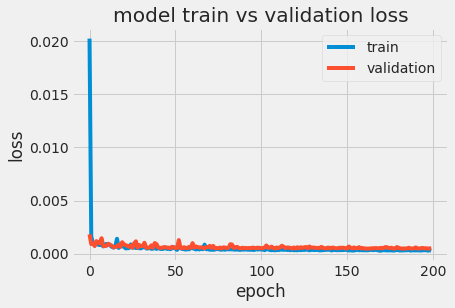

In [51]:
#train model
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Flatten
from matplotlib import pyplot as plt


#Build the LSTM model
model = Sequential()
model.add(LSTM(200, activation="relu",return_sequences=True, use_bias=True,input_shape= (x_train.shape[1],x_train.shape[2])))
model.add(Flatten())
#model.add(LSTM(100, return_sequences= False))
model.add(Dense(200))




model.add(Dense(y_train.shape[1]))
# Compile the model
model.compile(optimizer='Adam', loss='mean_squared_error',metrics=['accuracy'])

#Train the model
history=model.fit(x_train, y_train, batch_size=10,validation_data=(x_test, y_test), verbose=1,epochs=200)

# plot train and validation loss
#plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
model.save('strain.h5')

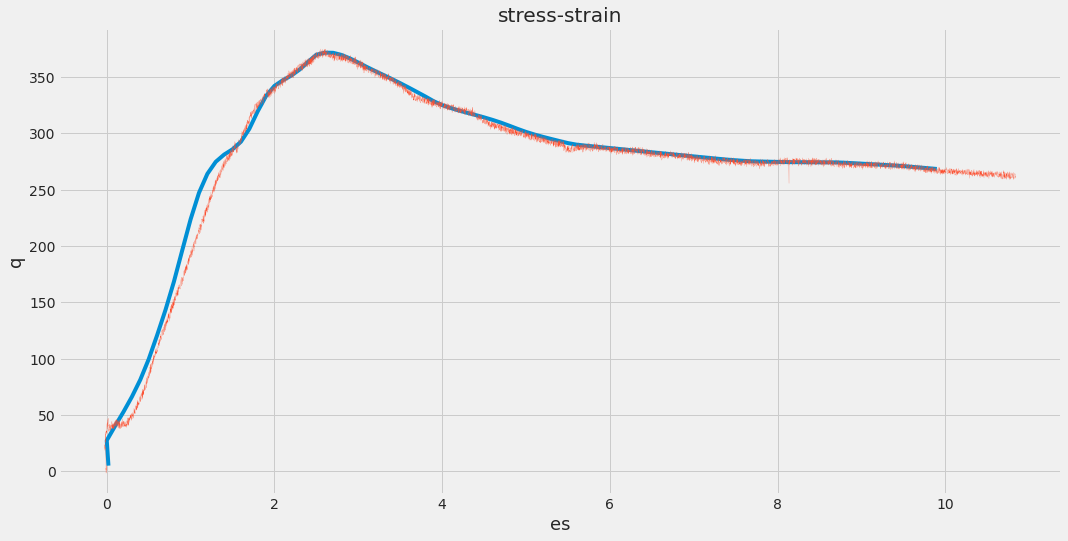

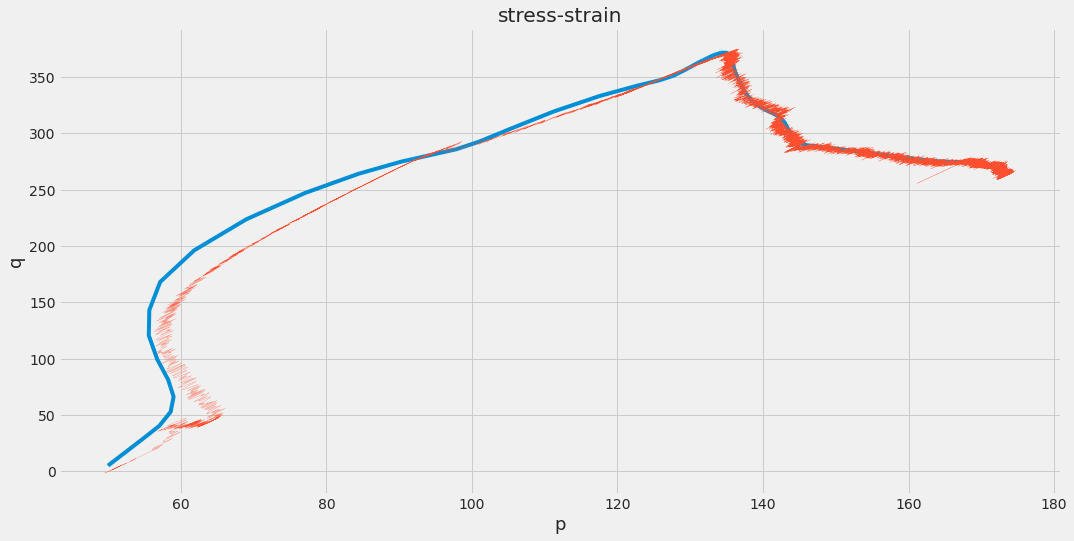

In [55]:
#predict next days

from tensorflow import keras
from pandas_datareader.data import DataReader
model = keras.models.load_model('strain.h5')
time_step=2
output=pd.DataFrame()
predict_step=100
n_features=3
strain_increment=0.1
ks=df

ini1=np.array([2,50,0.01]) #initial [q,p,strain,strain_increment]
ini2=np.array([5,50, 0.02])

'''ini1=np.array([2,50,0.01,strain_increment]) #initial [q,p,strain,strain_increment]
ini2=np.array([20,50, 0.02,strain_increment])
#ini3=np.array([100,50,0.03,strain_increment])'''

ini=np.vstack((ini1,ini2))
output = output.append(({'q': ini[time_step-1,0],'p':ini[time_step-1,1], 'es':ini[time_step-1,2]}),ignore_index=True)
#ini=np.vstack((ini1,ini))
ini=scaler_x.transform(ini)
ini=np.reshape(ini,(time_step,n_features))

strain=0
for i in range(predict_step):
    #ini_scaled = scaler.transform(ini)
    ini_scaled = (ini)
    ini_model=np.reshape(ini_scaled,(1,time_step,n_features))
    predict = model.predict(ini_model)
    predict=np.reshape(predict,(1,predict.shape[1]))
    #pre_nonscale = scaler2.inverse_transform(predict)
    pre_nonscale=scaler_y.inverse_transform(predict)
    #output = output.append(({'q': pre_nonscale[0,0], 'es':ini[0,2]}),ignore_index=True)
    output = output.append(({'q': pre_nonscale[0,0],'p':pre_nonscale[0,1], 'es':strain}),ignore_index=True)
    strain +=strain_increment
    new_step=np.array([pre_nonscale[0,0],pre_nonscale[0,1],strain])
    new_step1=np.reshape(new_step,(1,new_step.shape[0]))

    new_step=scaler_x.transform(new_step1)
    ini_t=np.vstack((ini,new_step[0,:]))
    ini=ini_t[1:,:]
    #ini_model =np.vstack(ini_model)
    #slice=ini[0:time_step-1,:]

    ''' ini[1,2]=ini[0,2]
    ini[1,1]=ini[0,1]
    ini[1,0]=ini[0,0]

    ini[0,2]=ini[0,2]+strain_increment
    ini[0,0]=pre_nonscale[0,0]
    ini[0,1]=pre_nonscale[0,1]'''



#plotdata
plt.figure(figsize=(16,8))
plt.title('stress-strain')
plt.plot(output['es'],output['q'])
plt.plot(df['es'],df['q'],linewidth=0.2)
plt.xlabel('es', fontsize=18)
plt.ylabel('q', fontsize=18)
plt.show()

plt.figure(figsize=(16,8))
plt.title('stress-strain')
plt.plot(output['p'],output['q'])
plt.plot(df['p'],df['q'],linewidth=0.2)
plt.xlabel('p', fontsize=18)
plt.ylabel('q', fontsize=18)
plt.show()

In [32]:
ini

array([[0.43856206, 0.97581125, 0.82641191],
       [0.43542955, 0.97836527, 0.84481873]])

In [ ]:
yi

,qn,pn
1,105.989080,58.712763
2,135.893413,57.014144
3,171.418273,62.442964
4,208.912674,71.779738
5,242.496158,81.491123
6,273.660720,91.281860
7,293.404041,101.396607
8,317.023546,112.782405
9,338.820101,121.774214
10,340.712902,123.191737


In [ ]:
output

,es,p,q
0,0.03,50.000000,1.000000
1,0.03,19.595890,42.831673
2,0.33,21.091883,58.808495
3,0.63,24.417765,87.296722
4,0.93,42.719349,176.688141
5,1.23,56.641872,250.060593
6,1.53,76.639915,350.081512
7,1.83,98.354721,434.229675
8,2.13,143.824280,513.102783
9,2.43,168.652847,570.626160


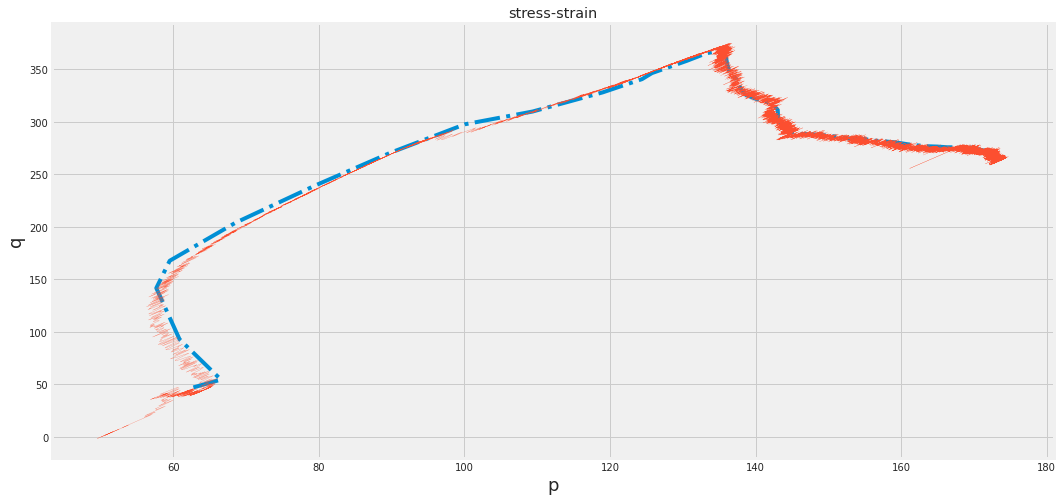

In [23]:
ks=df.iloc[::100, :].reset_index(drop=True)
x_train1, y_train1=setup_data(ks,3)
x_train1=scaler_x.transform(x_train1)
data_x=time_step_data(x_train1,time_step)
test_split=0.01
x_train, x_test, y_train, y_test=split_data(y_train1, data_x,test_split)



predictn = model.predict(data_x)
predict = scaler_y.inverse_transform(predictn)


#plotdata
plt.figure(figsize=(16,8))
plt.title('stress-strain')
plt.plot(predict[:,1],predict[:,0],'-.')
plt.plot(df['p'],df['q'],linewidth=0.2)
plt.xlabel('p', fontsize=18)
plt.ylabel('q', fontsize=18)
plt.show()




In [19]:
data_x.shape

(63, 2, 3)

In [ ]:
data_x[:-3,2,1].shape

(59,)

In [ ]:
y_train1[:,0]

array([135.8934126, 171.4182734, 208.9126744, 242.4961576, 273.6607199,
       293.4040413, 317.0235455, 338.8201007, 340.7129019, 356.6501807,
       363.7635419, 369.9033047, 366.743071 , 366.6533437, 360.9120666,
       354.7596425, 347.595437 , 335.3391653, 328.007656 , 325.1653376,
       324.9672836, 320.6558696, 316.0828298, 303.7676063, 300.8993341,
       301.4995037, 292.8681933, 290.7151174, 284.85126  , 289.391682 ,
       289.0540334, 285.6796094, 281.677066 , 287.1290756, 279.108155 ,
       283.580335 , 282.3979458, 276.2230637, 276.9549451, 275.7380117,
       277.1259129, 271.947342 , 275.9250663, 273.0348765, 276.0615374,
       275.7289717, 273.4239344, 271.304603 , 274.8583473, 271.1077286,
       270.6810244, 272.5911935, 269.0798889, 266.9265251, 267.5721172,
       263.0067536, 267.251459 , 262.4729177, 264.9332541])

In [ ]:
pre_nonscale

array([[31.383224, 62.58911 ]], dtype=float32)

In [ ]:
strain

5.009999999999999